# Binary Data 

In [1]:
## need this 

from astropy.io import fits

file = fits.open('all_columns_catalog_shift.fits') 
hdr = file[0].header
data = file[1].data


In [2]:
## need this 
cols = data.columns

In [3]:
## for data, each row corresponds to a binary pair. For every row, data about each star is entered one after the other.
## For example, the first two entries in a row are the same type of data, with one corresponding to each star 

In [4]:
import numpy as np
WDWD = data[np.nonzero(data['binary_type'] == 'WDWD')] 


In [5]:
from astropy import units as u

def absolute_mag(rel_mag, parallax):
    """Provide this function with relative magnitude and parallax in mas
    """
    parsec = (parallax*u.mas).to(u.pc, equivalencies=u.parallax())
    return rel_mag - 5*np.log10(parsec/(10*u.pc))

In [6]:
## need this 
from astropy.table import QTable, Table, Column
from matplotlib import pyplot as plt

data_rows = WDWD
table = Table(rows=data_rows, names=cols.names)

photometry_cols = []

for i in [1, 2]:
    for col in ['phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag']:

        colname = col + str(i)
        new_colname = col + '_abs' + str(i)
        dist = table['parallax' + str(i)]

        photometry_cols.append(photometry_cols)

        table[new_colname] = absolute_mag(table[colname], dist)

Text(0, 0.5, 'Absolute G Magnitude')

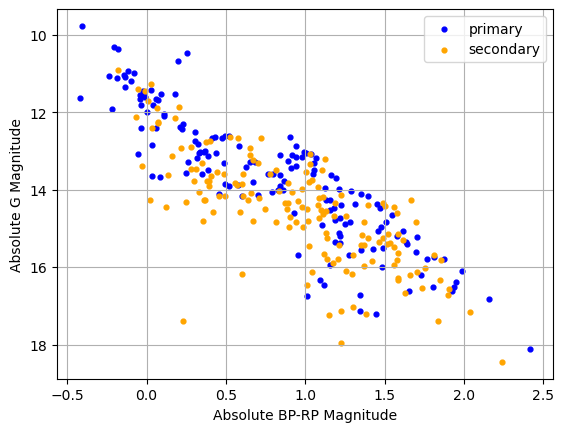

In [7]:
G1 = table['phot_g_mean_mag_abs1']
BPRP1 = table['phot_bp_mean_mag_abs1'] - table['phot_rp_mean_mag_abs1']

plt.scatter(BPRP1, G1, 12, color='blue', label='primary')

G2 = table['phot_g_mean_mag_abs2']
BPRP2 = table['phot_bp_mean_mag_abs2'] - table['phot_rp_mean_mag_abs2']

plt.scatter(BPRP2, G2, 12, color='orange', label='secondary')

ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.grid(which='both')
plt.legend()

plt.xlabel('Absolute BP-RP Magnitude')
plt.ylabel('Absolute G Magnitude')